In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Vamos supor um modelo composto de camadas homogêneas, em que as velocidades sejam constantes e crescentes, ou seja: 

$$v_1<v_2<v_3$$.

In [2]:
np.tan(np.deg2rad(30))*3000

1732.0508075688772

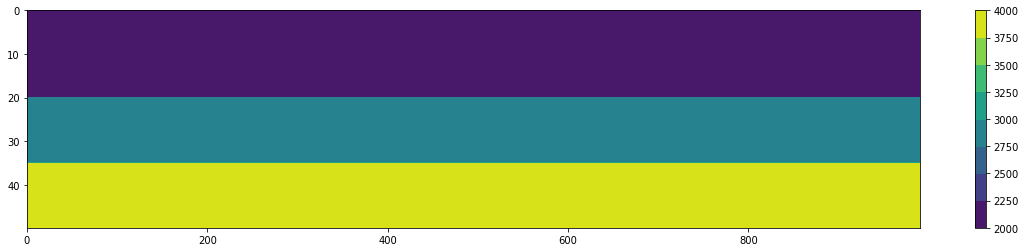

In [3]:
x = np.arange(0,1000,10)
y = np.arange(0,50,0.1)

xi,yi = np.meshgrid(x,y)

zi = np.zeros(shape=(np.shape(xi)))

zi[yi<=20] = 2000
zi[(yi>=20) & (yi<=35)] = 3000
zi[yi>=35] =4000

plt.figure(figsize=(20,4))
plt.gca().invert_yaxis()
plt.contourf(xi,yi,zi)
plt.colorbar()

In [4]:
def tempo_onda_direta(x,v):
    # x - é um array que indica a posição dos receptores
    # v - velocidade da primeira camada
    return x/v

#================= Onda refratada simples =====================#


def tempo_onda_refratada_simples(x,v,z):

    t = np.zeros(len(x)) ; theta = np.arcsin(v[0]/v[1])
    
    for i in range(0,len(x)):
        if x[i]>= z*np.tan(theta)/2:
            t[i] = (x[i]/v[1]) + (2*z*np.cos(theta)/v[0])
    return t

#================= Onda refratada n camadas =====================#


def tempo_refratada_n_camadas(x,v,z):
    
    t = np.zeros(len(x)); v=np.asarray(v) ; z=np.asarray(z)
    
    for i in range(0,len(x)):
        
        t[i] = x[i]/v[-1]
        
        xc = 0.0
        for j in range(0,len(z)):
            
            theta = np.arcsin(v[j]/v[j+1])
            t[i] += (2*z[j]*np.cos(theta))/v[j]
            xc += z[j]*np.tan(theta)/2
                
        if x[i] <  xc:    
            t[i] = 0
    
    return t

#### O tempo de trânsito da onda direta é definido como:

$$ t = \frac{x}{v} =\frac{\overline{AB}}{v_1} $$

#### Definindo os parâmetros iniciais do modelo:

In [5]:
v1,v2,v3 = 2000,3000,4000

### Gerando o tempo de trânsito da onda direta

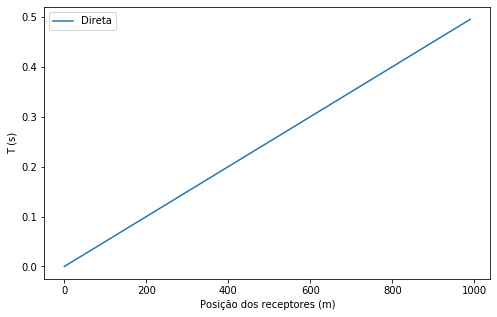

In [6]:
t_direta = tempo_onda_direta(x,v1)

plt.figure(figsize=(8,5))

plt.plot(x,t_direta,label='Direta')
plt.xlabel('Posição dos receptores (m)')
plt.ylabel('T (s)')
plt.legend()

### <center> Onda refratada </center>

#### Exemplo de duas camadas


Supondo que a trajetória percorrida pela frente de onda é igual ao caminho descrito na Fig. 1. Temos que o tempo de trânsito percorrido por um frente de onda será:

$$t = t_{AB}+t_{BC}+t_{CD} = \frac{\overline{AB}}{v_1} + \frac{\overline{BC}}{v_2} + \frac{\overline{CD}}{v_3}$$

$$ t = \frac{z}{v_1 \cos{\theta_c}}+ \frac{x-2z \tan{\theta_c}}{v_2} + \frac{z}{v_1 \cos{\theta_c}} $$

Esta equação pode ser reescrita como:

$$ t = \frac{x}{v_2} + \frac{2z \cdot \cos \theta_c}{v_1} $$

ou em função da velocidade

$$ t = \frac{x}{v_2} + 2z \cdot \frac{(v_2^2 - v_1^2)^1/2}{v_1 v_2} $$

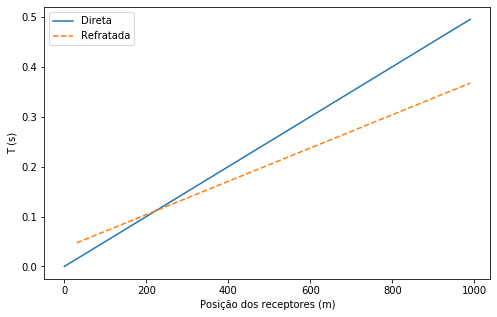

In [7]:
z=50
v=[v1,v2]
t_r1 = tempo_onda_refratada_simples(x,v,z)

plt.figure(figsize=(8,5))

plt.plot(x,t_direta,label='Direta')
plt.plot(x[t_r1>0],t_r1[t_r1>0],label='Refratada',ls='--')
plt.xlabel('Posição dos receptores (m)')
plt.ylabel('T (s)')
plt.legend()

#### Observando atentamente a equação da onda refratada:

$$ t = \frac{x}{v_2} + 2z \cdot \frac{(v_2^2 - v_1^2)^{1/2}}{v_1 v_2} = ax+b$$

verificamos que a segunda parcela corresponde ao coeficiente linear da reta:

$$b = 2z \cdot \frac{(v_2^2 - v_1^2)^{1/2}}{v_1 v_2}$$

a partir desta equação, podemos obter a espessura da camada 01:

$$ z_1 = \frac{v_1 v_2}{2(v_2^2 - v_1^2)^{1/2}}$$

e o coeficiente ângular, a, é dado por:

$$ a = \frac{1}{v_2} $$

### Distância de crossover ($x_{cros}$)

Há uma determinada distância em que o tempo de percusso do raio direto e refratado são iguais:

$$ \frac{x_{cros}}{v_1} = \frac{x_{cros}}{v_2} +  2z \cdot \frac{(v_2^2 - v_1^2)^{1/2}}{v_1 v_2} $$

podemos reescrever esta equação como:

$$ x_{cros} = 2z \left[ \frac{v_2 +v_1}{v_2 - v_1} \right]^{1/2} $$

In [8]:
xcros = 2*z * ((v2+v1)/(v2-v1))**(1/2)

tempo_onda_refratada_simples([xcros],v,z)

array([0.1118034])

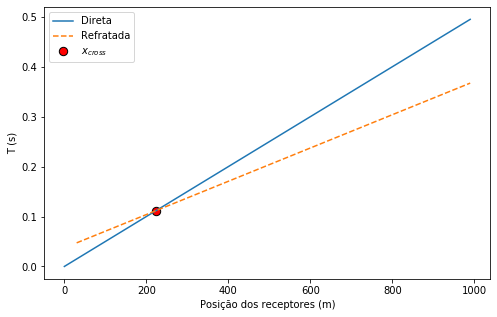

In [9]:
z=50
v=[v1,v2]
t_r1 = tempo_onda_refratada_simples(x,v,z)

plt.figure(figsize=(8,5))

plt.plot(x,t_direta,label='Direta')
plt.plot(x[t_r1>0],t_r1[t_r1>0],label='Refratada',ls='--')
plt.scatter(xcros,tempo_onda_refratada_simples([xcros],v,z),c='red',edgecolor='black',s=70,label='$x_{cross}$')
plt.xlabel('Posição dos receptores (m)')
plt.ylabel('T (s)')
plt.legend()

### <center> Modelo de três camadas horizontais </center>

$$t = \frac{\overline{AB}}{v_1} + \frac{\overline{BC}}{v_2} + \frac{\overline{CD}}{v_3} + \frac{\overline{DE}}{v_2} + \frac{\overline{EF}}{v_1} $$

por analogia a equação da onda refratada com duas camadas, temos:

$$t = \frac{x}{v_3} + \frac{2 z_1 \cos \theta_{12}}{v_1} + \frac{2 z_1 \cos \theta_{23}}{v_2}$$


____

### <center> Modelo de $n$ camadas horizontais </center>

Podemos formular uma Eq. geral, descrita pelo seguinte somatório:

$$t = \frac{x}{v_n} + \sum_{i=1}^{n-1} \frac{2z_i \cos \theta_{i,i+1}}{v_i}$$

em que $n$ indica o número de camadas, e $\theta_{i,i+1}$ indica o ângulo critico entre a í-esima camada e a camada í-esima+1. Lembrando que:

$$ \theta_{i,i+1} = \sin^{-1}\left( \frac{v_i}{v_{i,i+1}} \right) $$

#### Determinando as espessuras das camadas

Vamos generalizar o calculo de $z$ para um modelo de $n$ camadas:

$$ z_{n-1} = \left( t-\frac{x}{v_n}-\sum_{i=1}^{n-2} \frac{2 z_i \cos \theta_{i,i+1} }{v_i} \right) \frac{v_{n-1}}{2 \cos \theta_{n-1,n}}$$

___

### <center> Interpretação de Curvas tempo x distância </center>

<ol>
    
<li> Obter a velocidade da primeira camada a partir da onda direta ($v_1$); </li>

<li> Estimar velocidade da segunda camada a partir da reta da onda refratada ($v_2$);</li>

<li> Estimar espessura ($z_1$) </li>

<li> Utilizando os parâmetros obtidos, repetir o procedimento para obter as espessuras e velocidades das camadas mais profundas $v = v_2, v_3, ..., v_n$ e $z = z_1, z_2, ..., z_n$. </li>

</ol>

In [10]:
def tempo_onda_refratada_simples(x,v,z):

    t = np.zeros(len(x)) ; theta = np.arcsin(v[0]/v[1])
    
    for i in range(0,len(x)):
        if x[i]>= z*np.tan(theta)/2:
            t[i] = (x[i]/v[1]) + (2*z*np.cos(theta)/v[0])
    return t

In [11]:
v = [2000,3000,4000]
z = [50,100]
t_r2 = tempo_refratada_n_camadas(x,v,z)

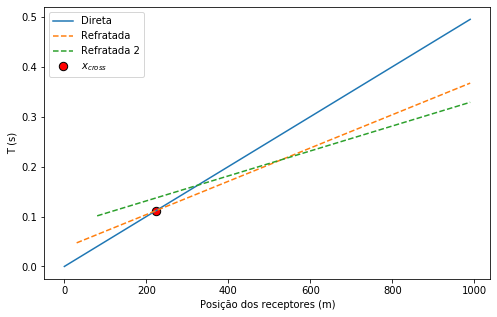

In [12]:
z=50
v=[v1,v2]
t_r1 = tempo_onda_refratada_simples(x,v,z)

plt.figure(figsize=(8,5))

plt.plot(x,t_direta,label='Direta')
plt.plot(x[t_r1>0],t_r1[t_r1>0],label='Refratada',ls='--')
plt.plot(x[t_r2>0],t_r2[t_r2>0],label='Refratada 2',ls='--')
plt.scatter(xcros,tempo_onda_refratada_simples([xcros],v,z),c='red',edgecolor='black',s=70,label='$x_{cross}$')
plt.xlabel('Posição dos receptores (m)')
plt.ylabel('T (s)')
plt.legend()

----

##  <center> Modelo de camadas inclinadas </center> 

Nos modelos de camada inclinada, o mergulho entra como uma icógnita adicional na equação de tempo de percuso da refração, e a recíproca do gradiente da curva não é mais válida para se obter a velocidade dos estratos mais profundos.

O método utilizado para interpertar / obter os parâmetros de um modelo por sísmica de refração consiste em reverter o experimento, obtendo gráficos de percurso direto (<i>forward</i>) e reverso (<i>reverse</i>).

A forma geral da equação do modelo de camada inclinada é a seguinte:

$$ t = \frac{x \sin \beta}{v_1} + \sum_{i=1}^{n-1} \frac{h_i (\cos \alpha_i + \cos \beta_i)}{v_i}$$

onde $h_i$ é a espessura da i-ésima camada, $v_i$ é a velocidade do raio na i-ésima camada, e $\alpha_i$ é o ângulo com respeito a vertical na direção do mergulho e $\beta_i$ no sentindo oposto.

Na direção do mergulho:

$$ \alpha_i = \theta_{i,i+1} - \gamma_i$$

e

$$\beta_i = \theta_{i,i+1} + \gamma_i $$

Na sentido oposto ao mergulho:

$$ \alpha_i = \theta_{i,i+1} + \gamma_i$$

e

$$\beta_i = \theta_{i,i+1} - \gamma_i $$

----

### Modelo com duas camadas 

Como exemplo da interpretação da equação de tempo de trânsito da camada inclinada, consideremo s um modelo composto por duas camadas, como mostra a figura a seguir:

FIGURA

$$ t = \frac{x \sin \beta_1}{v_1} + \frac{h_1 (\cos \alpha +\cos \beta)}{v_1} $$

$$ = \frac{x \sin \beta_1}{v_1} + \frac{h_1 \cos(\theta_{12} - \gamma_1)}{v_1} + \frac{h_1 \cos(\theta_{12} + \gamma_1)}{v_1}$$

$$ = \frac{x \sin \beta_1}{v_1} + \frac{2 h_1 \cos \theta_{12} \cos \gamma_1 }{v_1}$$

ou em função de z:

$$ t = \frac{x \sin \beta_1}{v_1} + \frac{2 z \cos \theta_{12} }{v_1} $$

---

Os gradientes da curva de tempo de trânsito x distância não refletem as verdadeiras velocidades, e sim as velocidades aparentes:

$$\frac{1}{v_{2d}} = \frac{\sin(\theta_{1,2}+\gamma_1)}{v_1} $$

e

$$\frac{1}{v_{2u}} = \frac{\sin(\theta_{1,2}-\gamma_1)}{v_1}$$

Daí temos:

$$ \theta_{1,2}+\gamma_1 = \sin^{-1} \left( \frac{v_1}{v_{2d}} \right) $$

$$ \theta_{1,2}-\gamma_1 = \sin^{-1} \left( \frac{v_1}{v_{2u}} \right) $$

Resolvendo para $\theta$ e $\gamma$:

$$ \theta_{1,2} = \frac{1}{2} \left[ \sin^{-1} \left( \frac{v_1}{v_{2d}} \right) + \sin^{-1} \left( \frac{v_1}{v_{2u}} \right) \right]$$

e

$$ \gamma_1 = \frac{1}{2} \left[ \sin^{-1} \left( \frac{v_1}{v_{2d}} \right) - \sin^{-1} \left( \frac{v_1}{v_{2u}} \right) \right]$$

---

Conhcendo-se $v_1$ e $\theta_{12}$, podemos determinar $v_2$:

$$ v_2 = \frac{ \sin \theta_{12}}{v_1} $$

e as distâncias $z$ e $z'$, podem ser obtidas a partir do coeficiente linear da reta:

$$b_{td} = \frac{2z \cos \theta_{12}}{v_1}$$

logo:

$$z= \frac{b_{td}\cdot v_1}{2\cos \theta_{12}}$$